In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/Code/

/content/gdrive/MyDrive/Code


In [3]:
!ls

dataset_intent.csv  MedlinePlus_12.csv	train.csv		     valid.csv
drug_dataset.csv    Statistic.ipynb	uncased_L-12_H-768_A-12      video_1
drug_frequency.png  test.csv		uncased_L-12_H-768_A-12.zip  Word-Cloud


In [4]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')


# Import packages and modules
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a dataframe
import re
from nltk.stem.snowball import SnowballStemmer


import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import re
from nltk.tokenize import regexp_tokenize , word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

import codecs
import os
import random

import string
# from hazm import Lemmatizer , Normalizer
# from hazm import Normalizer as hazm_norm
# from parsivar import Tokenizer , FindStems

import sklearn as sk
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.tokenize import regexp_tokenize , word_tokenize 
# from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from hazm import Normalizer, Lemmatizer, WordTokenizer, InformalNormalizer


import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
stop = stopwords.words('english')



import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Data


#####Question Numbers:  17743 rows × 5 columns
#####Uniqu drugs Number :  1616
#####Unique question Number:  139

In [74]:
import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
# df.head(3)
content = df['title']
df['title'] = content 
df['title']
# contect.head(3)

0                       Why is this medication prescribed?
1                        How should this medicine be used?
2                             Other uses for this medicine
3                What special precautions should I follow?
4        What special dietary instructions should I fol...
                               ...                        
17738                What other information should I know?
17739                                          Brand names
17740                        In case of emergency/overdose
17741                What other information should I know?
17742                                          Brand names
Name: title, Length: 17743, dtype: object

In [75]:
df["intent"] = df["title"].str.lower()#.str.split()

In [76]:
df["intent"] = df["intent"].str.replace('[^\w\s]',' ')

In [77]:
df["intent"]

0                       why is this medication prescribed 
1                        how should this medicine be used 
2                             other uses for this medicine
3                what special precautions should i follow 
4        what special dietary instructions should i fol...
                               ...                        
17738                what other information should i know 
17739                                          brand names
17740                        in case of emergency overdose
17741                what other information should i know 
17742                                          brand names
Name: intent, Length: 17743, dtype: object

In [78]:
#Lemmetize
# import nltk

# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# df["intent"] = df.intent.apply(lemmatize_text)
##########################################################
#Stemming
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['intent'] = df["intent"].apply(lambda x: [stemmer.stem(y) for y in w_tokenizer.tokenize(x)]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
df['intent']

0                         [whi, is, this, medic, prescrib]
1                    [how, should, this, medicin, be, use]
2                         [other, use, for, this, medicin]
3              [what, special, precaut, should, i, follow]
4        [what, special, dietari, instruct, should, i, ...
                               ...                        
17738               [what, other, inform, should, i, know]
17739                                        [brand, name]
17740                       [in, case, of, emerg, overdos]
17741               [what, other, inform, should, i, know]
17742                                        [brand, name]
Name: intent, Length: 17743, dtype: object

In [79]:
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["intent"] = df["intent"].apply(lambda x: [item for item in x if item not in stop])
df["intent"]

0                           [medic, prescrib]
1                              [medicin, use]
2                              [use, medicin]
3                  [special, precaut, follow]
4        [special, dietari, instruct, follow]
                         ...                 
17738                          [inform, know]
17739                           [brand, name]
17740                  [case, emerg, overdos]
17741                          [inform, know]
17742                           [brand, name]
Name: intent, Length: 17743, dtype: object

##Number of unique question after regex

In [103]:
intent_set =df["intent"].tolist()
intent_set.sort(reverse=True) 

iindex= []
for i in (intent_set):
    s = ' '.join(i)
    # print(s)
    iindex.append(s)

len(set(iindex))

131

In [105]:
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['intent'].apply(_remove)
df['intent'] = pd.DataFrame(z)
df['intent'].head(3)

0    medic prescrib
1       medicin use
2       use medicin
Name: intent, dtype: object

In [48]:
df.head(3)

,Section_Number,Link,drug_name,title,text,intent
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin


##Apply set in each rows of dataframe

In [51]:
#find max len in df['intent']
i =0
z = pd.DataFrame(df['intent'])


lens =[]
for index, row in z.iterrows():
    i += 1
    lens.append(len(row['intent']))


max_value = max(lens)
print("Max len: ",max_value )
max_index = lens.index(max_value)
print("dataframe len : ",max_index)
print(set(df['intent'][max_index]))
print(df['intent'][max_index])
print(df['title'][max_index])

Max len:  8
dataframe len :  9017
{'give', '19', 'pfizer', 'vaccin', 'biontech', 'covid'}
['pfizer', 'biontech', 'covid', '19', 'vaccin', 'give', 'covid', '19']
Will the Pfizer-BioNTech COVID-19 vaccine give me COVID-19?


In [33]:
z = pd.DataFrame(df['intent'])

for index, row in z.iterrows():
     df['intent'][index] = set(df['intent'][index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
df['intent']

0                           [medic, prescrib]
1                              [medicin, use]
2                              [use, medicin]
3                  [special, precaut, follow]
4        [special, dietari, instruct, follow]
                         ...                 
17738                          [inform, know]
17739                           [brand, name]
17740                   [case, emerg, overdo]
17741                          [inform, know]
17742                           [brand, name]
Name: intent, Length: 17743, dtype: object

#Category data value count
https://www.educative.io/edpresso/how-to-count-unique-items-in-pandas

In [53]:
value_bins = df['intent'].value_counts()
print(value_bins)

[medicin, use]                 1584
[inform, know]                 1584
[special, precaut, follow]     1584
[side, effect, medic, caus]    1583
[medic, prescrib]              1583
                               ... 
[tell, doctor]                    1
[risk, rabi, vaccin]              1
[yellow, fever]                   1
[prevent, yellow, fever]          1
[shingl, vaccin, recombin]        1
Name: intent, Length: 131, dtype: int64


In [54]:
# import pandas as pd
# import numpy as np

# # create a dataframe with one column
# df = pd.DataFrame({"col1": ["a", "b", "a", "c", "a", "a", "a", "c"]})
# # print the dataframe object
# print(df)
# # line break
# print("=" * 30)
# # counting unique items
# item_counts = df["col1"].value_counts()
# print(item_counts)

       Section_Number  ...                                intent
0                   1  ...                     [medic, prescrib]
1                   2  ...                        [medicin, use]
2                   3  ...                        [use, medicin]
3                   4  ...            [special, precaut, follow]
4                   5  ...  [special, dietari, instruct, follow]
...               ...  ...                                   ...
17738              10  ...                        [inform, know]
17739              11  ...                         [brand, name]
17740              10  ...                 [case, emerg, overdo]
17741              11  ...                        [inform, know]
17742              12  ...                         [brand, name]

[17743 rows x 6 columns]
[medicin, use]                 1584
[inform, know]                 1584
[special, precaut, follow]     1584
[side, effect, medic, caus]    1583
[medic, prescrib]              1583
              

##Chart in questions

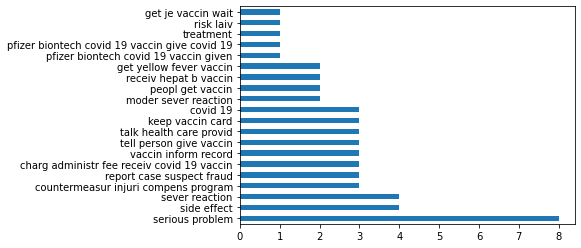

In [163]:
df["intent"].value_counts()[20:40].plot(kind='barh')

##intent lableing

1- medicin use , use medicin

2- inform know, import warn, notic, learn, know storag dispos medic , talk health care provid, countermeasur injuri compens program

3- serious reaction, risk vaccin reaction, side effect medic cuse, effect side, sever reaction, moder sever reaction, 

4- brand name, brand name combin product

5- medic prescrib, special precaut follow, special dietari instruct follow

6- forget dose, case emerg overdos

7- get vaccin, nation vaccin injuri compens program, vaccin rabi get, vaccin get hepat, vaccin peopl get, vaccin yellow fever get, vacin recive b hepat, vaccin get hpv, vaccin give tell person, vaccin card keep, vaccin inform record, fee charge vaccin 19 covid administr recive, 19 covid, vaccin tdap wait get, vaccin meningococc wait get, vaccin meningococc risk, charg administr fee receiv covid 19 vaccin, pfizer biontech covid 19 vaccin give covid 19, get wait get influenza vaccin

In [5]:
import pandas as pd
df = pd.read_csv('dataset_intent.csv')
df = pd.DataFrame(df)
# df.head(3)
# content = df['title']
# df['title'] = content 
# df['title']
# contect.head(3)

In [123]:
# df['final intent'] = np.nan
#select rows that contain specific text with indexes and fill with special intent
zz = pd.DataFrame(df[df['intent'].str.contains("case overdos")]['intent'])
 
indexes = []
flag = 0
for index, row in zz.iterrows():
     indexes.append(index)
    #  print(df['final intent'][index])#[indexes])
    #  print(df['title'][indexes])
     if str(df['final intent'][index]) == "nan" :
        flag = 1
        df['final intent'][index] = 'information'

if flag == 1 :
  print("yyyyyyyyyyyyyyyyy")


print("\n \n Number of rows which contain special word: ",len(indexes) ,'\n\n\n')



 
 Number of rows which contain special word:  1 





In [124]:
#count fill and nan in special column
print("Number of null rows: ",df['final intent'].isnull().sum())
print("Number of fill rows: ",(df.shape)[0] - df['final intent'].isnull().sum())

Number of null rows:  1
Number of fill rows:  17742


In [122]:
#check selected intent with question and text
intent_list = df['intent'].tolist()

for index, row in enumerate(intent_list):
    if row == 'drug' :
      print(df['title'][index])
      print(df['text'][index])
      print(df['final intent'][index])
      break


Drug
nan
nan


In [121]:
##rows which dont have final intent
df_null = df[df['final intent'].isnull()]#.index.tolist()
indexes = []
for index, row in df_null.iterrows():
     indexes.append(index)
    #  print(df['final intent'][indexes])
    #  print(df['intent'])
     print(df['intent'][index])

drug


In [151]:
#change value of dataframe

df.loc[df['final intent'] == 'medicin use']

vvv = df.loc[df['final intent'] == 'information']

v= []
xv = []
for index, row in vvv.iterrows():
    v.append(index)
    xv.append('informaition')
   

new_column = pd.Series(xv, name='final intent', index=v)
df.update(new_column)
df

In [152]:
df.to_csv('dataset_intent.csv')

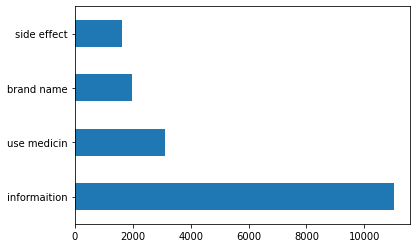

In [155]:
# (df['final intent'].tolist)
df["final intent"].value_counts()[:].plot(kind='barh')

In [ ]:
df.head(3)

In [ ]:
df["final intent"].value_counts()[:30].plot(kind='barh')

##Plot


In [ ]:
# df.sort_values(['drug_name' , 'title'], ascending=[True, True], inplace=True)
(df['intent'].value_counts()[:20]).plot.barh(figsize=(20, 20))

In [ ]:
(df['title'].value_counts()[:20]).plot.barh(figsize=(20, 20))

In [ ]:
questions = set(df['title'].unique())
print("Tedad questions: ", len(questions))
questions = list(questions)
questions.sort()
# drugs

In [ ]:
drugs = set(df['drug_name'].unique())
print("Tedad Daroo: ", len(drugs))
drugs = list(drugs)
drugs.sort()
# drugs

In [ ]:
#Exploratory Analysis

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df.title))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
comment_words = '' 
stop_words = set(STOPWORDS)

In [18]:
# Iterating through the .csv data file 
for i in df.title:
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

In [19]:
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

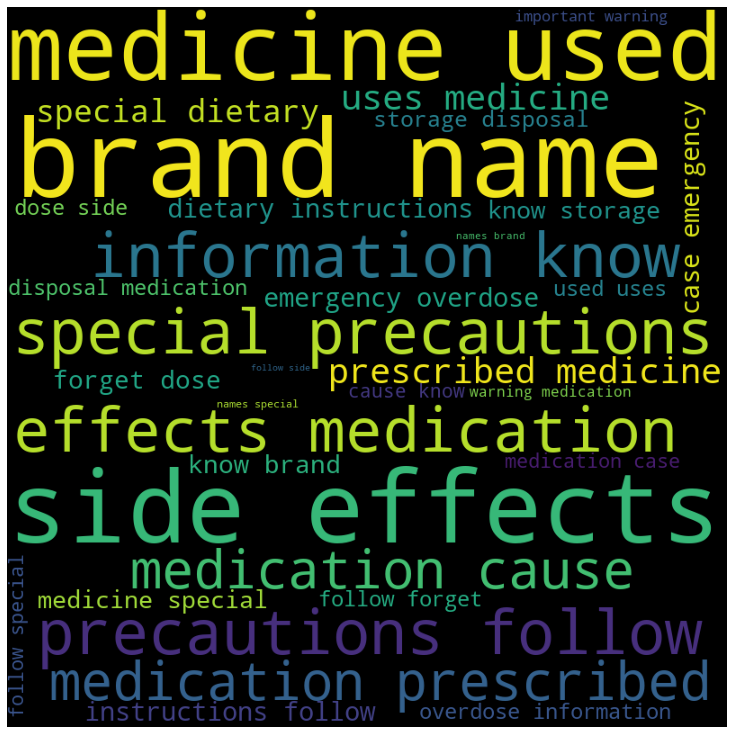

In [20]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

##Kmeans in question

In [70]:
df.intent

0                         medic prescrib
1                            medicin use
2                            use medicin
3                 special precaut follow
4        special dietari instruct follow
                      ...               
17738                        inform know
17739                         brand name
17740                 case emerg overdos
17741                        inform know
17742                         brand name
Name: intent, Length: 17743, dtype: object

In [73]:
#TF IDF
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_vectorizer = TfidfVectorizer(min_df=0.03, max_df=0.5)
tfidf = tfidf_vectorizer.fit_transform(df.intent.values)
terms = tfidf_vectorizer.get_feature_names()
print(tfidf_vectorizer.get_feature_names()[:20])
print(tfidf.shape)

['brand', 'case', 'caus', 'dietari', 'dispos', 'dose', 'effect', 'emerg', 'follow', 'forget', 'import', 'inform', 'instruct', 'know', 'medic', 'medicin', 'name', 'overdos', 'precaut', 'prescrib']
(17743, 25)


In [75]:
from sklearn.cluster import MiniBatchKMeans


# Using MiniBatchKMean to cluster
n_clusters = 10 #np.arange(9,18,1)
nc = n_clusters
init = ['k-means++','random']
# precompute_distances = [True,False]
algorithm = ['auto', 'elkan']
# c = tfidf_vectorizer.get_feature_names()
# for nc in n_clusters:
for ini in init:
    clust=MiniBatchKMeans(n_clusters=nc, init=ini, batch_size=5000)
    clust.fit(tfidf)
    centers = clust.cluster_centers_.argsort()[:,::-1]
    print("Len of Labels: ",len(set(clust.labels_)), " Params: ", clust.get_params())
    for i in range(0,nc):
        word_list=[]
        print("cluster%d:"% i)
        for j in centers[i,:5]:
            word_list.append(terms[j])
        print(word_list) 
    # evaluate(clust, tfidf)

Len of Labels:  10  Params:  {'batch_size': 5000, 'compute_labels': True, 'init': 'k-means++', 'init_size': None, 'max_iter': 100, 'max_no_improvement': 10, 'n_clusters': 10, 'n_init': 3, 'random_state': None, 'reassignment_ratio': 0.01, 'tol': 0.0, 'verbose': 0}
cluster0:
['use', 'medicin', 'warn', 'import', 'case']
cluster1:
['precaut', 'follow', 'special', 'warn', 'import']
cluster2:
['prescrib', 'medic', 'warn', 'import', 'medicin']
cluster3:
['storag', 'dispos', 'know', 'medic', 'warn']
cluster4:
['case', 'overdos', 'emerg', 'warn', 'inform']
cluster5:
['side', 'effect', 'caus', 'medic', 'medicin']
cluster6:
['name', 'brand', 'inform', 'case', 'caus']
cluster7:
['inform', 'know', 'warn', 'case', 'caus']
cluster8:
['dose', 'forget', 'warn', 'inform', 'case']
cluster9:
['instruct', 'dietari', 'special', 'follow', 'inform']
Len of Labels:  9  Params:  {'batch_size': 5000, 'compute_labels': True, 'init': 'random', 'init_size': None, 'max_iter': 100, 'max_no_improvement': 10, 'n_cluste

##Topic modelling(LDA) on Text

##DeepPavlov for intent classificaition
http://docs.deeppavlov.ai/en/master/features/models/classifiers.html

In [43]:
# !pip install -q deeppavlov
# !pip install fasttext

In [28]:
from deeppavlov import build_model, configs

CONFIG_PATH = configs.classifiers.intents_snips  # could also be configuration dictionary or string path or `pathlib.Path` instance

model = build_model(CONFIG_PATH, download=True)  # in case of necessity to download some data

model = build_model(CONFIG_PATH, download=False)  # otherwise


2021-07-20 12:05:56.805 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/embeddings/dstc2_fastText_model.bin download because of matching hashes
2021-07-20 12:05:57.570 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/classifiers/intents_snips_v9.tar.gz download because of matching hashes
2021-07-20 12:05:57.578 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /root/.deeppavlov/models/classifiers/intents_snips_v9/classes.dict]
2021-07-20 12:05:57.591 INFO in 'deeppavlov.models.embedders.fasttext_embedder'['fasttext_embedder'] at line 53: [loading fastText embeddings from `/root/.deeppavlov/downloads/embeddings/dstc2_fastText_model.bin`]


2021-07-20 12:06:01.683 INFO in 'deeppavlov.models.classifiers.keras_classification_model'['keras_classification_model'] at line 245: [initializing `KerasClassificationModel` from saved]


Instructions for updating:
Colocations handled automatically by placer.


2021-07-20 12:06:02.304 INFO in 'deeppavlov.models.classifiers.keras_classification_model'['keras_classification_model'] at line 255: [loading weights from model.h5]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2021-07-20 12:06:02.811 INFO in 'deeppavlov.models.classifiers.keras_classification_model'['keras_classification_model'] at line 129: Model was successfully initialized!
Model summary:
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 100)]  0                                            
__________________________________________________________________________________________________

['GetWeather']


In [29]:
print(model(["What is the weather in Boston today?"]))
# >>> [['GetWeather']]

['GetWeather']


In [32]:
import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
# df.head(3)
content = df['title']
df['title'] = content 
df['title']
# contect.head(3)

0                       Why is this medication prescribed?
1                        How should this medicine be used?
2                             Other uses for this medicine
3                What special precautions should I follow?
4        What special dietary instructions should I fol...
                               ...                        
17738                What other information should I know?
17739                                          Brand names
17740                        In case of emergency/overdose
17741                What other information should I know?
17742                                          Brand names
Name: title, Length: 17743, dtype: object

In [42]:
# df_title = pd.DataFrame(df['title'])
# type(df_title)
df_title =  df["title"].tolist()
for index, row in enumerate(df_title):
  print(row)
  print(model([row]))

Why is this medication prescribed?
['SearchScreeningEvent']
How should this medicine be used?
['GetWeather']
Other uses for this medicine
['SearchScreeningEvent']
What special precautions should I follow?
['SearchScreeningEvent']
What special dietary instructions should I follow?
['SearchScreeningEvent']
What should I do if I forget a dose?
['SearchCreativeWork']
What side effects can this medication cause?
['SearchScreeningEvent']
Why is this medication prescribed?
['SearchScreeningEvent']
How should this medicine be used?
['GetWeather']
Other uses for this medicine
['SearchScreeningEvent']
What special precautions should I follow?
['SearchScreeningEvent']
What special dietary instructions should I follow?
['SearchScreeningEvent']
What side effects can this medication cause?
['SearchScreeningEvent']
In case of emergency/overdose
['SearchCreativeWork']
What other information should I know?
['SearchScreeningEvent']
IMPORTANT WARNING: 
['SearchCreativeWork']
Why is this medication prescr

KeyboardInterrupt: ignored